In [1]:
import joblib as jb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, MarkerCluster
import seaborn as sns
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
delhi=pd.read_csv("Delhi_v2.csv")
delhi.drop(columns='Unnamed: 0',inplace=True)
delhi.describe()

price         area     latitude    longitude     Bedrooms  \
count  7.738000e+03  7738.000000  7738.000000  7738.000000  7738.000000   
mean   8.320635e+06  1409.506591    28.552092    77.273476     2.708193   
std    7.223197e+06   718.929581     0.107420     0.180606     0.877026   
min    1.700000e+06   501.000000    28.240023    76.884101     2.000000   
25%    4.200000e+06   990.000000    28.455539    77.078590     2.000000   
50%    6.000000e+06  1250.000000    28.574637    77.345320     3.000000   
75%    9.500000e+06  1650.000000    28.642520    77.421054     3.000000   
max    8.500000e+07  9500.000000    28.799748    77.688028    10.000000   

         Bathrooms      Balcony      parking         Lift    Price_sqft  
count  7738.000000  5166.000000  2612.000000  1733.000000   7738.000000  
mean      2.501163     2.426442     7.673047     1.829198   5543.660241  
std       0.867050     1.083677    60.417508     1.192607   2408.659307  
min       2.000000     1.000000     1.000000     0.000000   2100.000000  
25%       2.000000     2.000000     1.000000     1.000000   3950.986915  
50%       2.000000     2.000000     1.000000     2.000000   4972.674332  
75%       3.000000     3.000000     2.000000     2.000000   6350.638693  
max      10.000000    10.000000  1406.000000    10.000000  44378.698225

In [3]:
delhi.head()

price                                            Address    area  \
0   5600000.0                  Noida Extension, Noida, Delhi NCR  1350.0   
1   8800000.0                      Sector 79, Gurgaon, Delhi NCR  1490.0   
2  16500000.0                     Vaishali, Ghaziabad, Delhi NCR  2385.0   
3   3810000.0  Link Road, F Block, Sector 50, Noida, Uttar Pr...  1050.0   
4   6200000.0  Jaypee Pavilion Court Sector 128, Noida, Secto...  1350.0   

    latitude  longitude  Bedrooms  Bathrooms  Balcony              Status  \
0  28.608850  77.460560       3.0        3.0      NaN  Under Construction   
1  28.374236  76.952416       3.0        3.0      NaN       Ready to Move   
2  28.645769  77.385110       4.0        5.0      NaN       Ready to Move   
3  28.566914  77.436434       2.0        2.0      3.0                 NaN   
4  28.520732  77.356491       2.0        2.0      3.0       Ready to Move   

       neworold  parking Furnished_status  Lift                   Landmarks  \
0  New Property      NaN              NaN   2.0                         NaN   
1  New Property      NaN   Semi-Furnished   2.0                         NaN   
2  New Property      1.0      Unfurnished   NaN                         NaN   
3  New Property      1.0      Unfurnished   2.0  near Gaur Mulberry Mansion   
4        Resale      1.0              NaN   3.0                         NaN   

  type_of_building                                               desc  \
0             Flat  \n\n\n                                Welcome ...   
1             Flat  \n\n\n                                Mapsko M...   
2             Flat  \n\n\n                                This pro...   
3             Flat  \n\n\n                                AIG Roya...   
4             Flat  \n\n\n                                The prop...   

    Price_sqft  
0  4148.148148  
1  5906.040268  
2  6918.238994  
3  3628.571429  
4  4592.592593

In [4]:
delhi.dtypes

price               float64
Address              object
area                float64
latitude            float64
longitude           float64
Bedrooms            float64
Bathrooms           float64
Balcony             float64
Status               object
neworold             object
parking             float64
Furnished_status     object
Lift                float64
Landmarks            object
type_of_building     object
desc                 object
Price_sqft          float64
dtype: object

In [5]:
for i in delhi.columns[delhi.dtypes==object]:
    print("\n",i,"\n")
    print(delhi[i].unique())
    print(delhi[i].value_counts())


 Address 

['Noida Extension, Noida, Delhi NCR' 'Sector 79, Gurgaon, Delhi NCR'
 'Vaishali, Ghaziabad, Delhi NCR' ...
 'Sector137 Noida Paramount Floraville, Sector 137, Noida, Delhi NCR'
 'Greater Noida, Sector 2, Greater Noida, Delhi NCR'
 'sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR']
Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
NH 24, Ghaziabad, Delhi NCR                                                    61
                                                                             ... 
e block sector 57, Sector 57, Gurgaon, Delhi NCR                                1
Ramakrishna apartment, Indraprastha Extension, New Delhi - East, Delhi NCR      1
Rajnagar Extension Gah

In [6]:
def editing(data):
    l=[]
    #data["District"]=[((i.split(","))[-2].lower()).strip() for i in data.Address]
    data=data[data.Price_sqft<75000]
    data.drop(columns=["Address","Status","desc","Price_sqft"],inplace=True)
    data.neworold.replace(["Resale","New Property",'Other\n\t\t\t\t\t\t\t\t\tGet Documents Verified'],[0,1,0],inplace=True)
    data.type_of_building.replace(["Flat","Individual House"],[0,1],inplace=True)
    data.Furnished_status.replace(['Semi-Furnished', 'Unfurnished', 'Furnished'],[1,0,2],inplace=True)
    for i in data.Landmarks:
        if type(i)==str:
            l.append(1)
        else:
            l.append(0)     
    data.Landmarks=l
    data.replace(np.nan,0,inplace=True)
    l=[]
    for i in data.Lift:
        if i>0:
            l.append(1)
        else:
            l.append(0)
    data.Lift=l
    l=[]        
    for i in data.parking:
        if i>0:
            l.append(1)
        else:
            l.append(0)        
    data.parking=l
    data.price=data.price/1000000
    data=data[data.price<100]
    data=data[data.price>1]
    return data  
delhi=editing(delhi)

In [7]:
sns.set_style("whitegrid")
def map_func(data):
    map_data=data[['latitude','longitude','price']]
    city_map = folium.Map(location=[data.latitude.mean(),data.longitude.mean()], zoom_start=9.5, tiles='openstreetmap')
    mc = MarkerCluster()
    for idx, row in map_data.iterrows():
        popup = """
        Price : <b>%s</b><br>
        """ % ( row['price'])
        mc.add_child(folium.Marker([row['latitude'], row['longitude']],tooltip=popup))
        city_map.add_child(mc)
    return city_map
map_func(delhi)

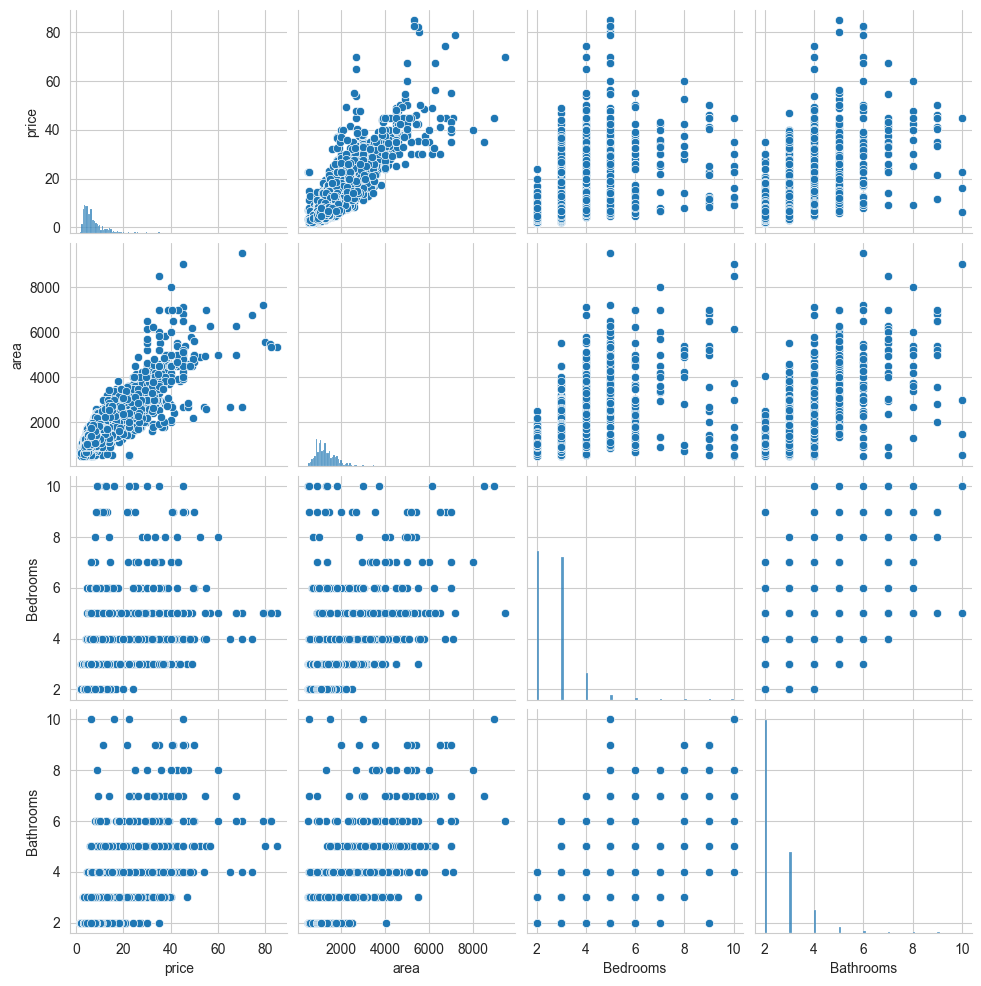

In [8]:
l=['price', 'area', 'Bedrooms', 'Bathrooms']
sns.pairplot(delhi[l])

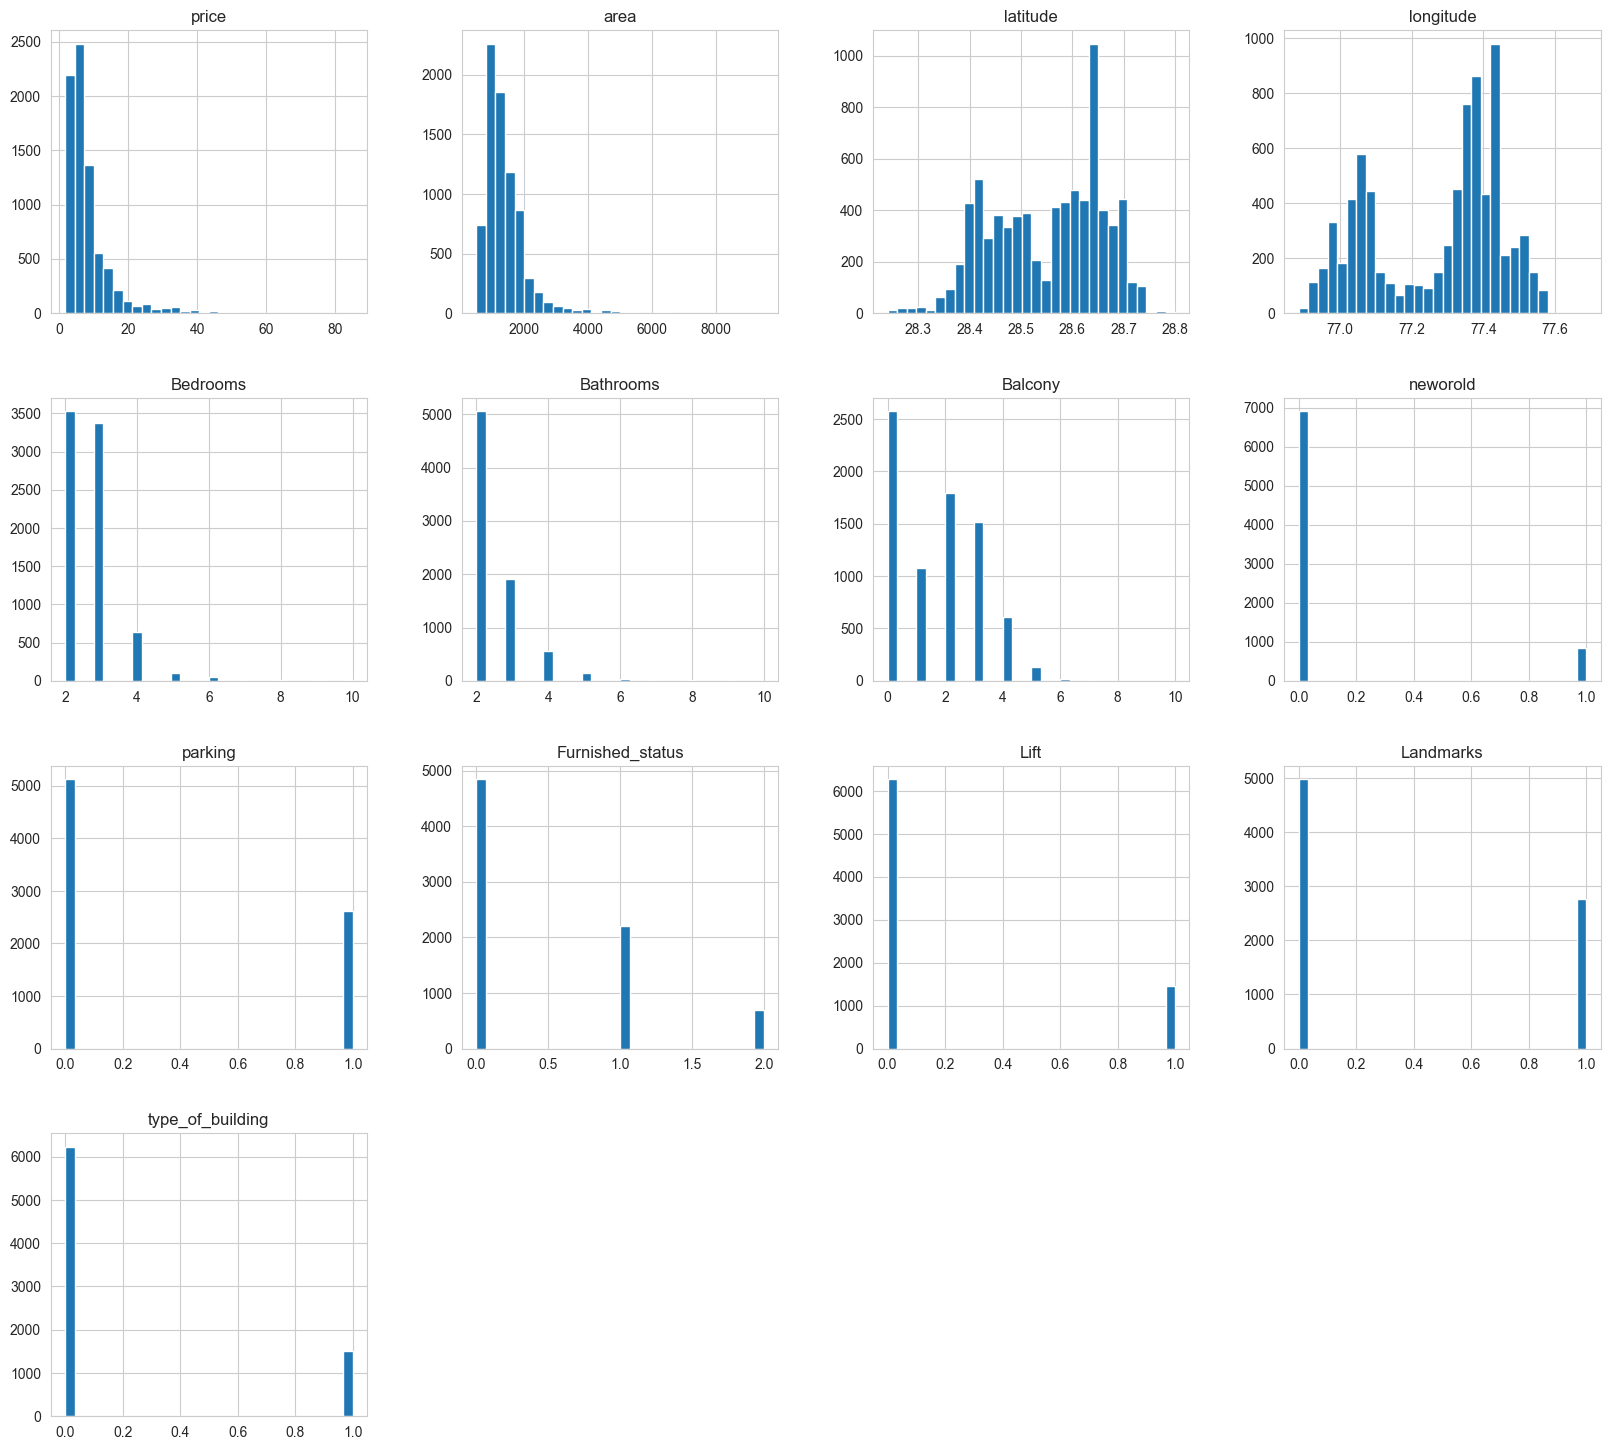

In [9]:
delhi.hist(bins=30,figsize=(20,18))
plt.show()

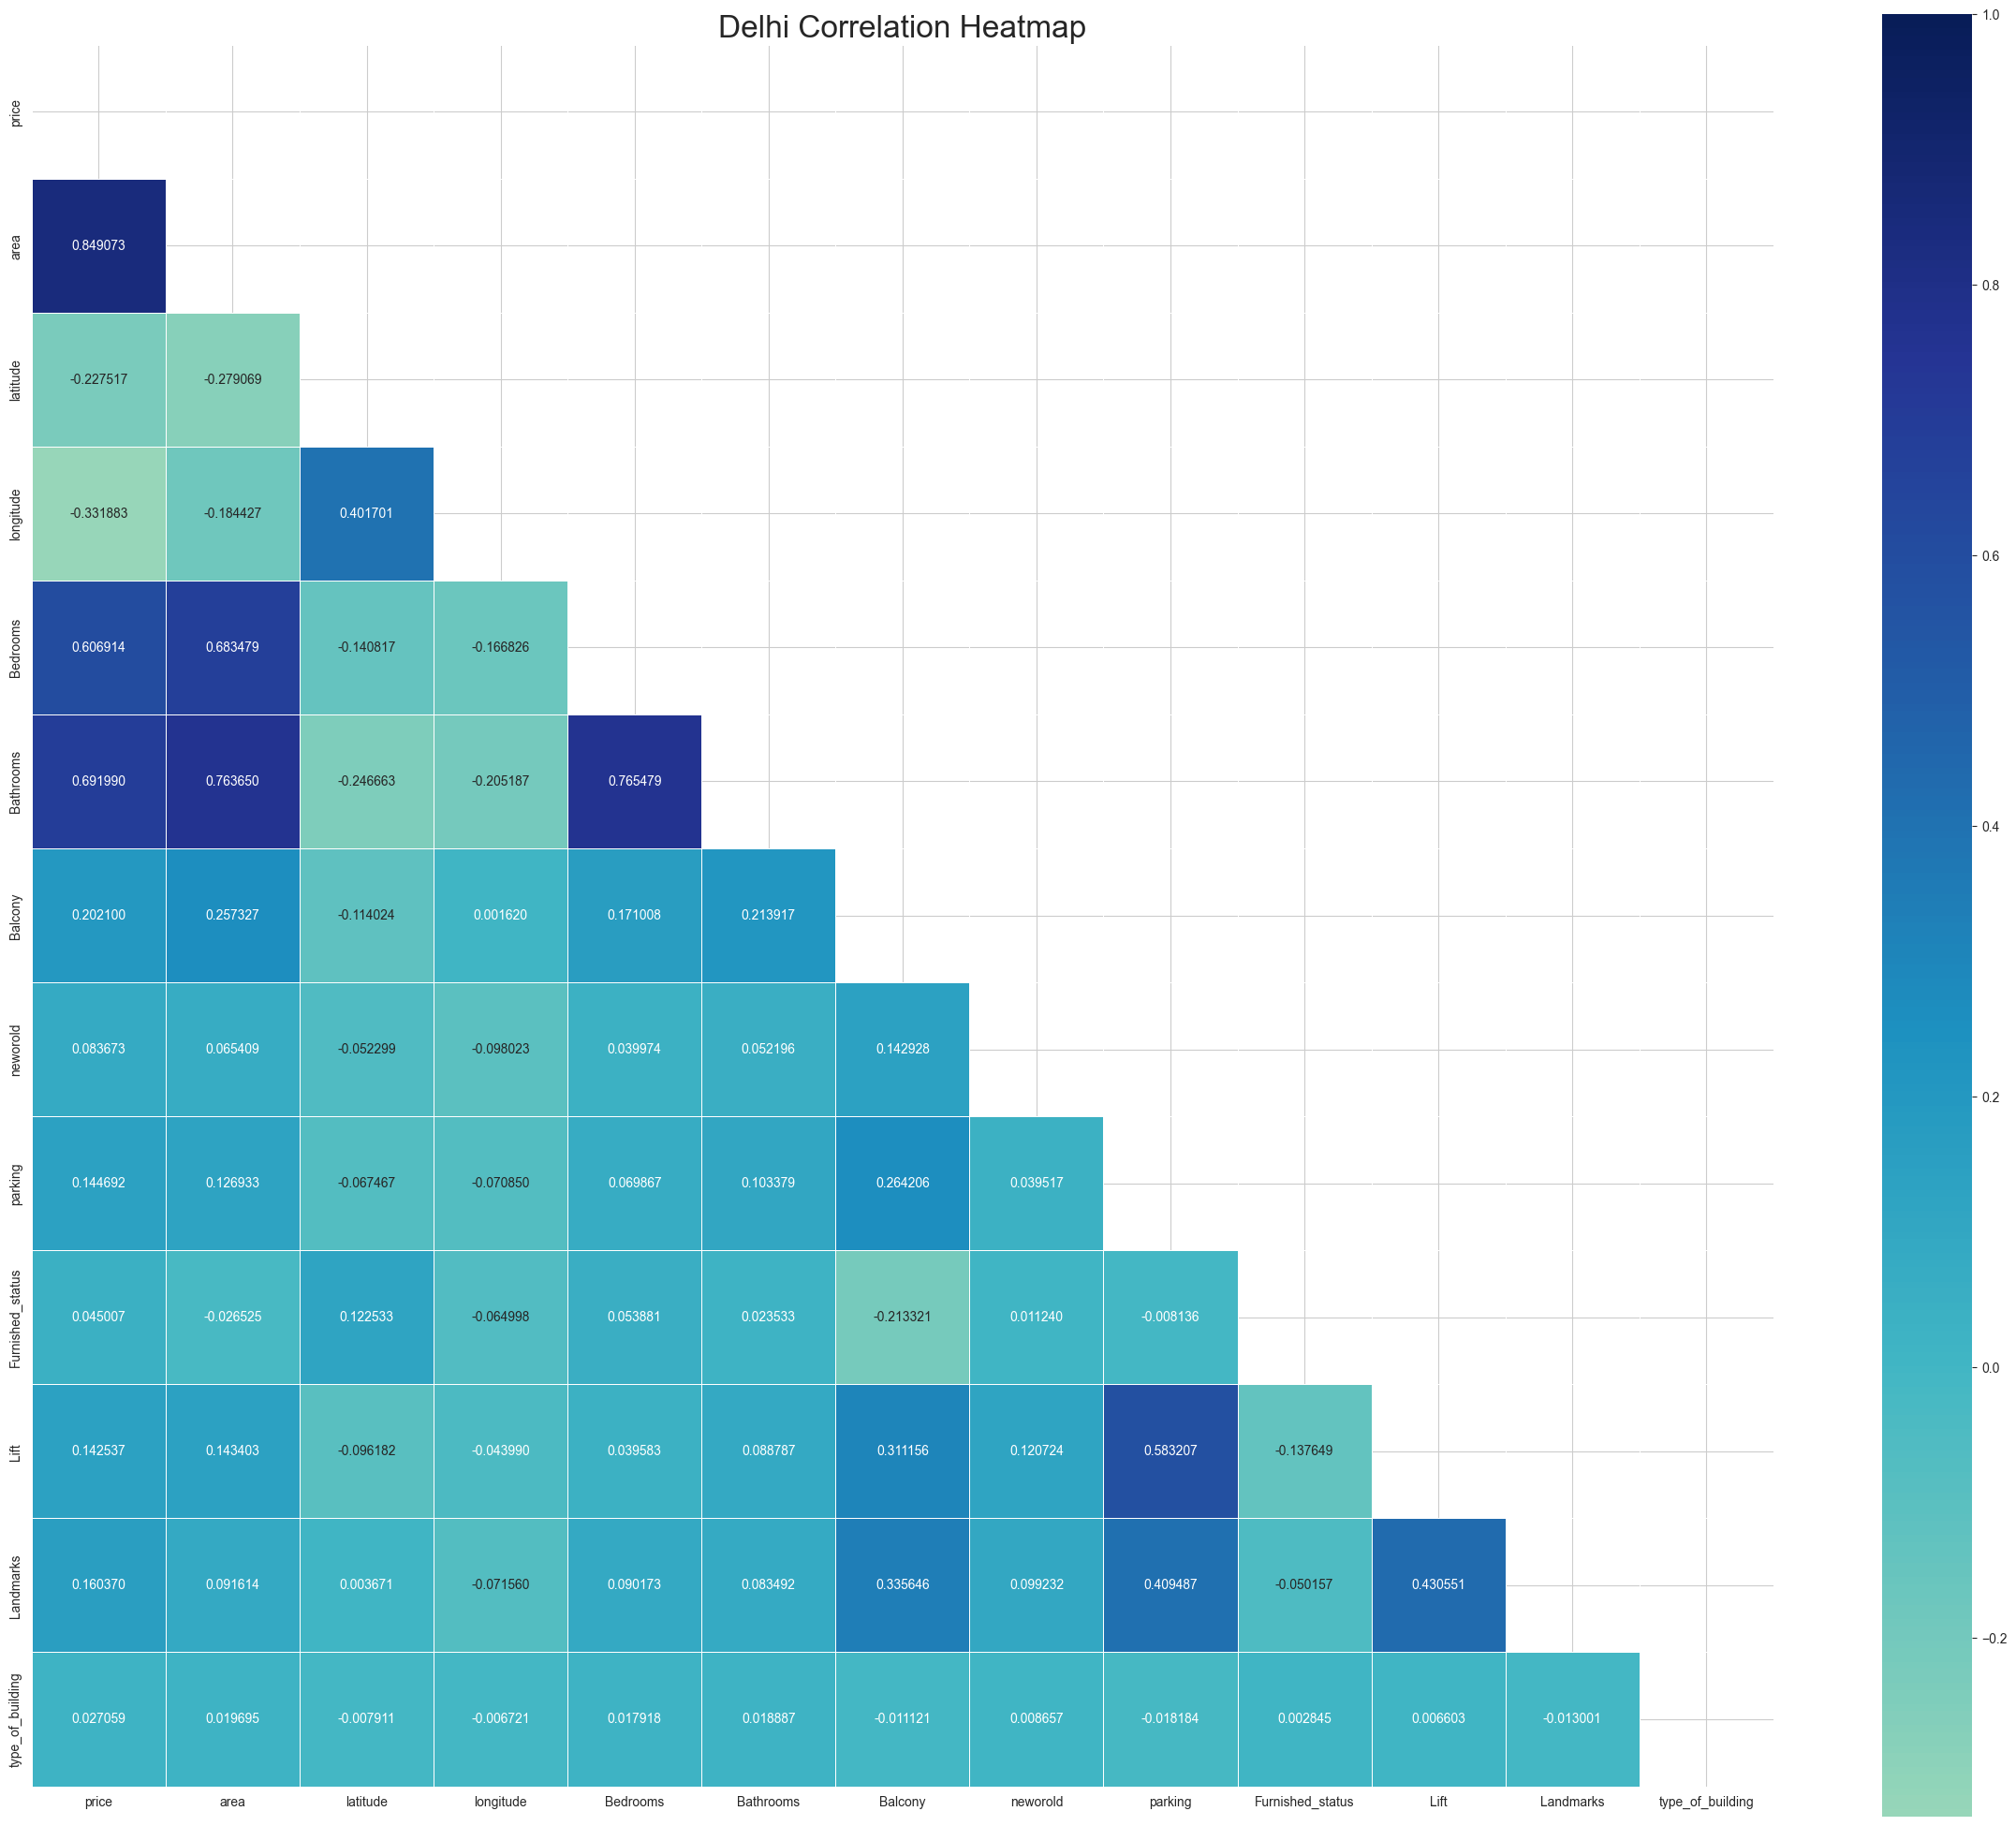

In [10]:
def corr_func(data,title):
    plt.figure(figsize=(30,25))
    corr_matrix=data.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig=sns.heatmap(data.corr(),mask=mask, cmap="YlGnBu", vmax=1, center=0, fmt="f",square=True, linewidths=.5,annot=True)
    plt.title(title, fontsize=24)
    plt.show()
corr_func(delhi,"Delhi Correlation Heatmap")

In [11]:
train=delhi[:7000]
test=delhi[7000:]

In [12]:
def preprocess(data):
    try:   
        data.area=np.log2(data.area)
        data["new"]=data.latitude*data.longitude
        data["new2"]=data.Bedrooms*delhi.Bathrooms
        data=data.drop(columns='longitude')
    except:
        pass
    return data
        

## Model 1 Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(train.drop(columns='price'),train['price'])
predicted=model1.predict(test.drop(columns='price'))
predicted

array([30.10223601, 15.16165401, 28.20562783,  5.2283907 ,  1.95741514,
       12.49319774,  4.18031588,  8.14842738,  8.7585378 ,  5.11841253,
       12.44994814, 24.38270336, 19.96459785, 12.91129093, 12.53490717,
        8.97303092,  8.69523583, 11.37917377, 13.25944731, 20.33908823,
       14.41388753,  2.80299777, 17.20108203,  5.31952   ,  4.43933264,
        9.82110908,  4.6417172 ,  9.53884257, 12.36742275, 15.79345926,
       13.74607147, 18.48954016,  2.63957031, 14.12959406, 12.18179726,
       17.42180433, 22.47164976, 21.00682146, 14.88332779, 10.77990896,
        6.92530471,  4.25424316,  7.51830972, 16.78869103,  3.23008945,
       11.60227164,  4.35073827,  7.96299295,  6.21809272, 11.564152  ,
       18.15123395, 11.52503511, 11.65071247, 24.47350835,  3.24857167,
       18.54173555,  6.93876027, 17.09312902,  8.57663238,  5.38744991,
        9.79666879,  5.1880084 ,  5.61304267, 17.47784484,  5.48519021,
        6.41132359, 10.43081511, 15.66429944,  5.67211999, 11.74

In [14]:
r2_score(test.price,predicted)

0.801115762495974

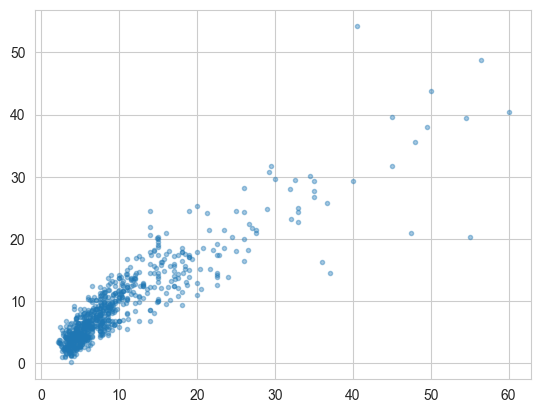

In [15]:
plt.scatter(test.price,predicted,alpha=0.4,marker=".")
plt.show()

In [16]:
#evaluating the model
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(test['price'],predicted)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

3.614105405309903

In [17]:
#using cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,delhi,delhi["price"],scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [18]:
rmse_scores

array([1.39684828e-13, 3.07358229e-14, 1.10825196e-13, 5.09738921e-14,
       1.45483059e-13, 7.05899447e-14, 3.48860995e-14, 5.94933290e-14,
       3.76277391e-13, 1.96025101e-13])

In [19]:
def print_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard deviation: ",scores.std())

In [20]:
print_scores(rmse_scores)

Scores:  [1.39684828e-13 3.07358229e-14 1.10825196e-13 5.09738921e-14
 1.45483059e-13 7.05899447e-14 3.48860995e-14 5.94933290e-14
 3.76277391e-13 1.96025101e-13]
Mean:  1.214974664150235e-13
Standard deviation:  9.931567479203155e-14


In [21]:
X_test=delhi.drop("price",axis=1)
Y_test=delhi["price"].copy()
X_test_prepared=X_test
final_predictions=model1.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[ 6.71092969 10.94876884 16.90543617 ... 10.24441769  8.53582457
 10.14355253] [5.6, 8.8, 16.5, 3.81, 6.2, 3.7, 3.2700000000000005, 3.99, 3.5, 5.5, 7.3, 7.7, 10.5, 7.2, 7.0, 9.5, 15.0, 4.8, 5.1, 14.0, 6.25, 8.7, 13.0, 15.0, 5.5, 4.2, 3.9, 10.0, 7.6, 3.9, 9.0, 8.35, 13.5, 5.31, 15.0, 17.5, 5.0, 3.5, 4.55, 4.0, 3.5, 3.5, 2.4, 80.0, 9.5, 10.5, 7.5, 4.8, 5.6, 8.5, 4.7, 8.5, 10.0, 18.0, 12.4, 7.7, 6.0, 12.5, 6.38, 7.4, 8.4, 6.4, 19.0, 4.3, 23.8, 10.5, 10.8, 5.5, 4.32, 3.0, 3.5, 16.0, 3.0, 3.3, 8.2, 6.0, 4.1, 5.2, 21.0, 2.65, 10.0, 4.5, 6.9, 13.5, 4.5, 32.5, 11.0, 3.2, 3.2, 3.4, 11.100000000000001, 3.5, 12.5, 8.5, 4.2, 82.0, 9.0, 14.0, 8.9, 3.2, 15.0, 9.2, 11.5, 6.0, 3.9, 3.6, 49.0, 7.5, 18.0, 17.2, 17.0, 5.5, 13.0, 9.9, 7.0, 5.15, 7.5, 2.63, 4.6, 7.5, 7.0, 5.8, 5.2, 26.0, 20.0, 3.2, 8.5, 4.32, 6.709999999999999, 16.9, 12.5, 5.0, 12.0, 2.7, 11.0, 14.0, 7.5, 12.0, 4.1, 3.79, 5.2, 12.5, 15.2, 10.5, 4.0, 3.3299999999999996, 17.0, 3.6, 4.5, 5.5, 24.5, 45.0, 5.0, 12.5, 7.4, 4.1, 16.0, 3.25, 5.5, 

In [22]:
final_rmse

3.470231102572754

## Model 2 Desission Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(train.drop(columns='price'),train['price'])
predicted=model2.predict(test.drop(columns='price'))

In [24]:
for i in predicted:
    print(i*1000000)

27000000.0
17500000.0
20500000.0
5500000.0
2500000.0
13500000.0
5600000.0
5270000.0
8000000.0
4200000.0
5700000.0
35000000.0
14500000.0
24400000.0
13400000.0
7400000.0
5200000.0
11000000.0
10000000.0
49500000.0
12000000.0
3250000.0
16000000.0
4700000.0
3750000.0
12000000.0
3770000.000000001
10000000.0
16000000.0
8940000.0
10500000.0
49500000.0
2650000.0
16000000.0
16000000.0
15800000.0
35200000.0
37500000.0
14500000.0
9000000.0
11500000.0
3300000.0
5700000.0
18500000.0
7000000.0
10200000.0
6300000.0
4500000.0
10000000.0
10500000.0
17000000.0
9000000.0
12500000.0
11200000.000000002
2800000.0
24500000.0
8900000.0
19000000.0
6000000.0
4000000.0
8000000.0
5800000.0
8000000.0
17000000.0
9500000.0
6600000.0
11000000.0
13000000.0
7500000.0
11000000.0
8700000.0
6300000.0
16000000.0
16500000.0
11000000.0
24000000.0
9500000.0
7500000.0
32500000.0
14600000.0
11800000.0
4200000.0
25500000.0
14500000.0
18400000.0
8600000.0
10500000.0
5400000.0
14500000.0
4500000.0
9500000.0
21000000.0
13500000.0
25

In [25]:
r2_score(test.price,predicted)

0.8632187113623226

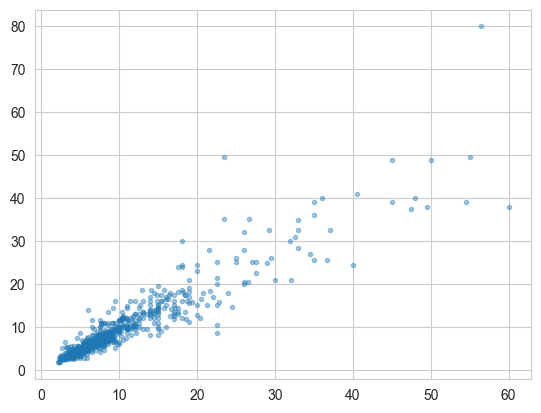

In [26]:
plt.scatter(test.price,predicted,alpha=0.4,marker=".")
plt.show()

In [27]:
#evaluating the model
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(test['price'],predicted)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

2.997187949225245

In [28]:
#using cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,delhi,delhi["price"],scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [29]:
rmse_scores

array([0.20795516, 0.2525237 , 0.03741657, 0.0293623 , 0.08236805,
       0.01111369, 0.01894504, 0.0082437 , 0.20184498, 0.35764629])

In [30]:
def print_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard deviation: ",scores.std())

In [31]:
print_scores(rmse_scores)

Scores:  [0.20795516 0.2525237  0.03741657 0.0293623  0.08236805 0.01111369
 0.01894504 0.0082437  0.20184498 0.35764629]
Mean:  0.12074194980356312
Standard deviation:  0.11810024292881038


In [32]:
X_test=delhi.drop("price",axis=1)
Y_test=delhi["price"].copy()
X_test_prepared=X_test
final_predictions=model2.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[ 5.6   8.8  16.5  ...  7.    4.25 10.  ] [5.6, 8.8, 16.5, 3.81, 6.2, 3.7, 3.2700000000000005, 3.99, 3.5, 5.5, 7.3, 7.7, 10.5, 7.2, 7.0, 9.5, 15.0, 4.8, 5.1, 14.0, 6.25, 8.7, 13.0, 15.0, 5.5, 4.2, 3.9, 10.0, 7.6, 3.9, 9.0, 8.35, 13.5, 5.31, 15.0, 17.5, 5.0, 3.5, 4.55, 4.0, 3.5, 3.5, 2.4, 80.0, 9.5, 10.5, 7.5, 4.8, 5.6, 8.5, 4.7, 8.5, 10.0, 18.0, 12.4, 7.7, 6.0, 12.5, 6.38, 7.4, 8.4, 6.4, 19.0, 4.3, 23.8, 10.5, 10.8, 5.5, 4.32, 3.0, 3.5, 16.0, 3.0, 3.3, 8.2, 6.0, 4.1, 5.2, 21.0, 2.65, 10.0, 4.5, 6.9, 13.5, 4.5, 32.5, 11.0, 3.2, 3.2, 3.4, 11.100000000000001, 3.5, 12.5, 8.5, 4.2, 82.0, 9.0, 14.0, 8.9, 3.2, 15.0, 9.2, 11.5, 6.0, 3.9, 3.6, 49.0, 7.5, 18.0, 17.2, 17.0, 5.5, 13.0, 9.9, 7.0, 5.15, 7.5, 2.63, 4.6, 7.5, 7.0, 5.8, 5.2, 26.0, 20.0, 3.2, 8.5, 4.32, 6.709999999999999, 16.9, 12.5, 5.0, 12.0, 2.7, 11.0, 14.0, 7.5, 12.0, 4.1, 3.79, 5.2, 12.5, 15.2, 10.5, 4.0, 3.3299999999999996, 17.0, 3.6, 4.5, 5.5, 24.5, 45.0, 5.0, 12.5, 7.4, 4.1, 16.0, 3.25, 5.5, 9.0, 17.5, 9.9, 8.5, 5.89, 9.0, 24.0,

In [33]:
final_rmse

0.9274103286690656

## Model 3 Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
model3= RandomForestRegressor()
model3.fit(train.drop(columns='price'),train['price'])
predicted=model3.predict(test.drop(columns='price'))

In [35]:
for i in predicted:
    print(i*1000000)

36354000.0
17444399.999999996
22788000.0
4904166.666666668
2351300.0
14207000.0
4858900.000000002
5628300.0
7181699.999999994
3658500.000000002
7338000.000000005
26380000.00000001
18914000.0
23313000.000000004
12583499.999999998
7823300.0
6336000.0
9193100.000000002
9796000.0
36584000.0
11940666.666666668
3281000.0000000005
15334000.000000002
4339383.333333334
4247599.999999998
8348399.999999998
3869000.0000000014
11501399.999999996
12404600.0
9500700.000000002
10275700.000000002
31604000.0
2862199.999999999
12508400.000000002
16534000.000000002
18101999.999999996
31982999.999999978
33214000.000000007
13937799.999999998
10123399.999999994
8238900.000000003
3738249.9999999995
5588199.999999997
16969000.0
5812799.999999999
9661100.000000006
5626400.000000001
5240400.000000001
8527000.000000004
10122599.999999998
18727000.0
9684299.999999996
9435700.0
18488000.000000004
2602500.000000001
19663000.0
7634799.999999995
20299000.000000004
6370700.0
3734300.0
7487000.000000002
5443500.00000000

In [36]:
r2_score(test.price,predicted)

0.9161907394999849

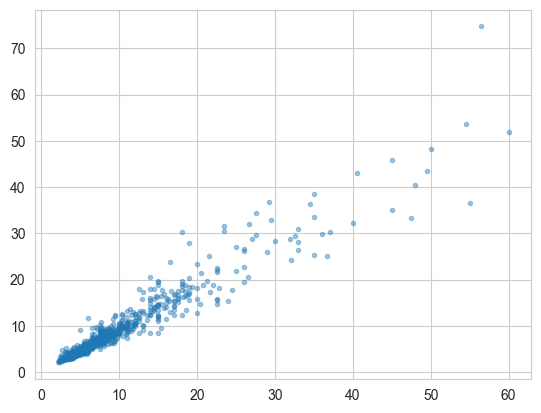

In [37]:
plt.scatter(test.price,predicted,alpha=0.4,marker=".")
plt.show()

In [38]:
#evaluating the model
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(test['price'],predicted)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

2.346100632486184

In [39]:
#using cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,delhi,delhi["price"],scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [40]:
rmse_scores

array([0.289955  , 0.25231333, 0.04087543, 0.04268901, 0.10503845,
       0.01104957, 0.01905046, 0.00736638, 0.22972733, 0.38784574])

In [41]:
def print_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard deviation: ",scores.std())

In [42]:
print_scores(rmse_scores)

Scores:  [0.289955   0.25231333 0.04087543 0.04268901 0.10503845 0.01104957
 0.01905046 0.00736638 0.22972733 0.38784574]
Mean:  0.13859106920450293
Standard deviation:  0.13188083318940197


In [43]:
X_test=delhi.drop("price",axis=1)
Y_test=delhi["price"].copy()
X_test_prepared=X_test
final_predictions=model3.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[ 5.4694      9.1296     15.004      ...  7.092       4.9555
  9.46563333] [5.6, 8.8, 16.5, 3.81, 6.2, 3.7, 3.2700000000000005, 3.99, 3.5, 5.5, 7.3, 7.7, 10.5, 7.2, 7.0, 9.5, 15.0, 4.8, 5.1, 14.0, 6.25, 8.7, 13.0, 15.0, 5.5, 4.2, 3.9, 10.0, 7.6, 3.9, 9.0, 8.35, 13.5, 5.31, 15.0, 17.5, 5.0, 3.5, 4.55, 4.0, 3.5, 3.5, 2.4, 80.0, 9.5, 10.5, 7.5, 4.8, 5.6, 8.5, 4.7, 8.5, 10.0, 18.0, 12.4, 7.7, 6.0, 12.5, 6.38, 7.4, 8.4, 6.4, 19.0, 4.3, 23.8, 10.5, 10.8, 5.5, 4.32, 3.0, 3.5, 16.0, 3.0, 3.3, 8.2, 6.0, 4.1, 5.2, 21.0, 2.65, 10.0, 4.5, 6.9, 13.5, 4.5, 32.5, 11.0, 3.2, 3.2, 3.4, 11.100000000000001, 3.5, 12.5, 8.5, 4.2, 82.0, 9.0, 14.0, 8.9, 3.2, 15.0, 9.2, 11.5, 6.0, 3.9, 3.6, 49.0, 7.5, 18.0, 17.2, 17.0, 5.5, 13.0, 9.9, 7.0, 5.15, 7.5, 2.63, 4.6, 7.5, 7.0, 5.8, 5.2, 26.0, 20.0, 3.2, 8.5, 4.32, 6.709999999999999, 16.9, 12.5, 5.0, 12.0, 2.7, 11.0, 14.0, 7.5, 12.0, 4.1, 3.79, 5.2, 12.5, 15.2, 10.5, 4.0, 3.3299999999999996, 17.0, 3.6, 4.5, 5.5, 24.5, 45.0, 5.0, 12.5, 7.4, 4.1, 16.0, 3.25, 5.5, 9.0,

In [44]:
final_rmse

0.9874623568823994